In [4]:
import pandas as pd
df = pd.read_csv("titanic_data_set.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print "Rows and Columns :: " + str(df.shape)

Rows and Columns :: (891, 12)


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
survived = df[df["Survived"]==1]
survived.head()
print "No. of Passengers Survived :: " + str(len(survived)) + "/891"

No. of Passengers Survived :: 342/891


In [11]:
not_survived = df[df["Survived"]==0]
not_survived.head()
print "No. of Passengers Died :: " + str(len(not_survived)) + "/891"

No. of Passengers Died :: 549/891


In [12]:
s = (float(len(survived))/len(df)*100.0)
ns = (float(len(not_survived))/len(df)*100.0)
print "Percentage of Passengers Survived :: %.2f" %(s) + "%"
print "Percentage of Passengers Died :: %.2f" %(ns) + "%"
print "Total Passengers :: %d" %len(df)

Percentage of Passengers Survived :: 38.38%
Percentage of Passengers Died :: 61.62%
Total Passengers :: 891


In [13]:
df.Pclass.value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [15]:
df.groupby('Sex').Pclass.value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [16]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df.groupby(["Pclass","Sex"]).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [18]:
a = df.groupby(["Pclass","Sex"]).Survived.value_counts()
for key,values, in a.iteritems():
    print key, values

(1L, 'female', 1L) 91
(1L, 'female', 0L) 3
(1L, 'male', 0L) 77
(1L, 'male', 1L) 45
(2L, 'female', 1L) 70
(2L, 'female', 0L) 6
(2L, 'male', 0L) 91
(2L, 'male', 1L) 17
(3L, 'female', 0L) 72
(3L, 'female', 1L) 72
(3L, 'male', 0L) 300
(3L, 'male', 1L) 47


In [19]:

perc_of_1class_Survived = a[1,'female',1].astype('float32') / (a[1,'female',1] + a[1, 'female' ,0]).astype('float32')
print perc_of_1class_Survived *100

96.80851101875305


In [20]:
perc_of_1class_Survived = a[1,'male',1].astype('float32') / (a[1,'male',1] + a[1, 'male' ,0]).astype('float32')
print perc_of_1class_Survived *100

36.88524663448334


In [21]:
perc_of_1class_Survived = a[2,'female',1].astype('float32') / (a[2,'female',1] + a[2, 'female' ,0]).astype('float32')
print perc_of_1class_Survived *100

92.1052634716034


In [22]:
perc_of_1class_Survived = a[2,'male',1].astype('float32') / (a[2,'male',1] + a[2, 'male' ,0]).astype('float32')
print perc_of_1class_Survived *100

15.740740299224854


In [23]:
perc_of_1class_Survived = a[3,'female',1].astype('float32') / (a[3,'female',1] + a[3, 'female' ,0]).astype('float32')
print perc_of_1class_Survived *100

50.0


In [24]:
perc_of_1class_Survived = a[3,'male',1].astype('float32') / (a[3,'male',1] + a[3, 'male' ,0]).astype('float32')
print perc_of_1class_Survived *100

13.54466825723648


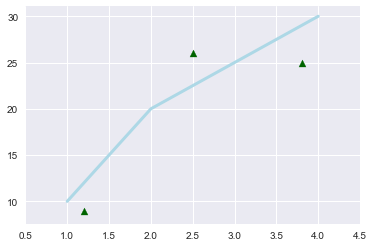

In [12]:
import pandas as pd
df = pd.read_csv("titanic_data_set.csv")
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

In [21]:
import pandas as pd
df = pd.read_csv("titanic_data_set.csv")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  

# setting seaborn default for plots

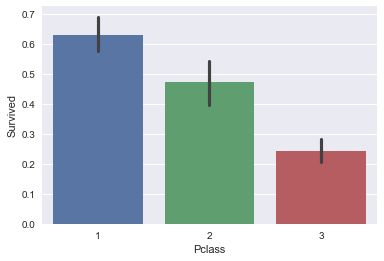

In [10]:
import pandas as pd
df = pd.read_csv("titanic_data_set.csv")
sns.barplot(x='Pclass', y='Survived', data=df)

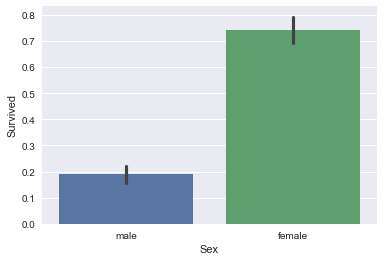

In [16]:
sns.barplot(x='Sex', y='Survived', data=df)

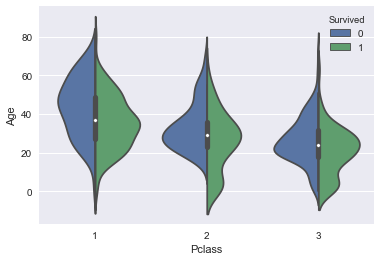

In [22]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)


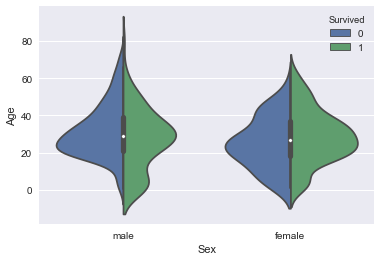

In [23]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

In [6]:
import pandas as pd
df = pd.read_csv("titanic_data_set.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
from sklearn.preprocessing import Imputer
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
age_imputer = age_imputer.fit(df.iloc[ : , [5]])
df.iloc[:, [5]] = age_imputer.transform(df.iloc[:, [5]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
a = df.Embarked.describe()
print a


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


In [17]:
most_freq = a['top']
print most_freq


S


In [20]:
df["Embarked"] = df["Embarked"].fillna(most_freq)


In [23]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_Sex = LabelEncoder()
df.iloc[ :, [4]] = labelEncoder_Sex.fit_transform(df.iloc[ :, [4]])
df.head()

c:\python27\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df = pd.get_dummies(df,columns =["Pclass","Embarked"])
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


In [25]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,2
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,1


In [26]:
irrelevant_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin','Fare']
df = df.drop(irrelevant_features , axis =1)
df.head()

,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,1,22.0,0,0,1,0,0,1,2
1,1,0,38.0,1,0,0,1,0,0,2
2,1,0,26.0,0,0,1,0,0,1,1
3,1,0,35.0,1,0,0,0,0,1,2
4,0,1,35.0,0,0,1,0,0,1,1


In [27]:
df.to_csv('titanic_preprocessed_data.csv')

In [28]:
df2 = pd.read_csv('titanic_preprocessed_data.csv')
df2.head()

,Unnamed: 0,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,0,1,22.0,0,0,1,0,0,1,2
1,1,1,0,38.0,1,0,0,1,0,0,2
2,2,1,0,26.0,0,0,1,0,0,1,1
3,3,1,0,35.0,1,0,0,0,0,1,2
4,4,0,1,35.0,0,0,1,0,0,1,1
